In [11]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import requests

# parametros: colocar los codigos, fecha inicial, fecha final, -> formato Y-mm-dd   
# interno: separar entre los tipos de datos por frecuencia
# para trimestreal, convertir las fechas a numeros de 1 a 4
# mensuales son compatibles a los de dias pero convertir a formato bY
# anuales solo el anio
# diarios

: 

In [12]:
diarios = ['PD38032DD', 'PD04699XD']
mensuales = ['RD38085BM', 'RD38307BM']
trimestrales = ['PD37940PQ', 'PN38975BQ']
anuales = ['PM06069MA', 'PM06078MA']
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codes}/json/{begin}/{end}/ing"

all_freq = diarios + mensuales + trimestrales + anuales

# test

In [89]:

d_format = '%Y-%m-d'
mq_format = '%Y-%m-d'

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD38032DD-PD04699XD/json/2011-1-1/2023-7-1/ing


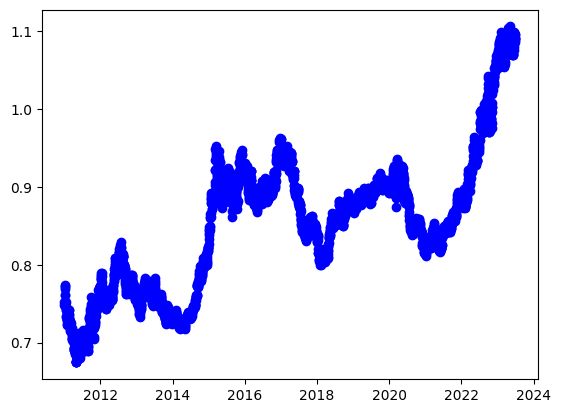

In [25]:
import pandas as pd
import requests

def obtener_datos_api_bcrp(url):
    """
    Función para descargar datos de la API del BCRP y convertirlos en un DataFrame.

    Parámetros:
        url (str): URL de la API del BCRP.

    Retorna:
        pd.DataFrame: DataFrame con los datos de la API.
    """
    # Hacer la solicitud a la API
    print(url)
    response = requests.get(url)
    data = response.json()

    # Extraer los nombres de las series
    series_names = [serie["name"] for serie in data["config"]["series"]]

    # Crear una lista de periodos y valores
    periods = data["periods"]

    # Convertir los datos en un DataFrame
    df = pd.DataFrame(
        [
            {"fecha": period["name"], **dict(zip(series_names, period["values"]))}
            for period in periods
        ]
    )

    # Reemplazar nombres de meses no reconocidos por pandas
    meses = {
        "Ene": "Jan", "Abr": "Apr", "Ago": "Aug", "Set": "Sep", 
        "Dic": "Dec"
    }
    for mes_es, mes_en in meses.items():
        df["fecha"] = df["fecha"].str.replace(mes_es, mes_en)

    # Convertir la columna de fecha a tipo datetime
#    df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y", dayfirst=True)

    # Convertir los valores a tipo numérico
    #print(series_names)
    for serie in series_names:
        df.loc[:, serie] = pd.to_numeric(df[serie], errors='coerce')

    return df

# Ejemplo de uso
# url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04649MD-PD04650MD/json/2011-1-1/2023-7-1/ing"
url1 = url.format(codes = "-".join(diarios), begin = '2011-1-1', end='2023-7-1')
df = obtener_datos_api_bcrp(url1)
df["fecha"] = pd.to_datetime(df["fecha"], format="%d.%b.%y")
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()
# df

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/RD38085BM-RD38307BM/json/2015-12-12/2023-7-1/ing


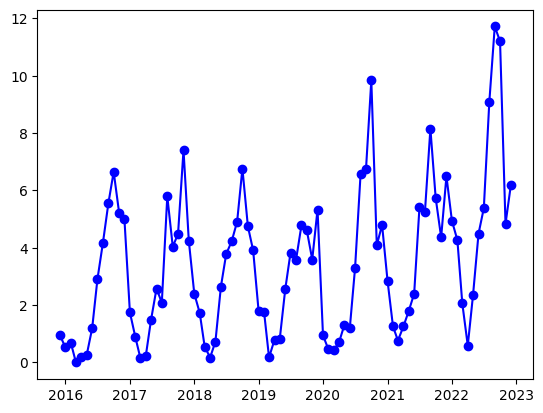

In [106]:
url3 = url.format(codes = "-".join(mensuales), begin = '2015-12-12', end='2023-7-1')
df = obtener_datos_api_bcrp(url3)
df["fecha"] = pd.to_datetime(df["fecha"], format="%b.%Y")
df.head()
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD37940PQ-PN38975BQ/json/2016-0/2023-7-1/ing


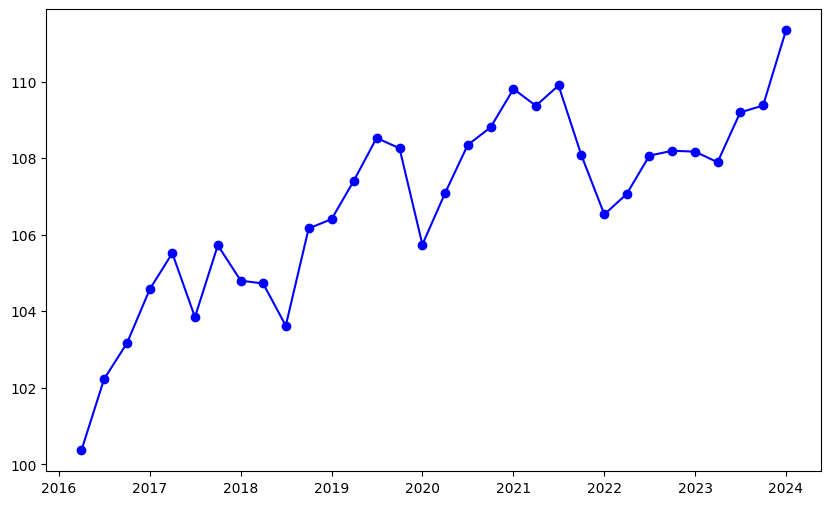

In [111]:
url3 = url.format(codes = "-".join(trimestrales), begin = '2016-0', end='2023-7-1')
df = obtener_datos_api_bcrp(url3)
df["fecha"] = pd.PeriodIndex(
    df["fecha"].str.replace(r"Q(\d)\.(\d{2})", r"\2Q\1", regex=True), 
    freq="Q"
)
df.head()

import matplotlib.pyplot as plt

# Convertir la columna "fecha" al formato timestamp para el gráfico
df["fecha"] = df["fecha"].dt.to_timestamp(how="end")

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()


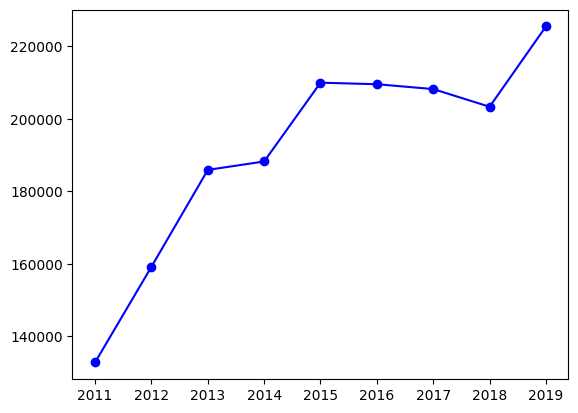

In [100]:
url2 = url.format(codes = "-".join(anuales), begin = '2011', end='2019')
df = obtener_datos_api_bcrp(url2)
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y")
df.head()
plt.plot(df["fecha"], df.iloc[:, 1], label=df.columns[1], marker="o", linestyle="-", color="blue") 
plt.show()

In [94]:
dict(
    A = "%Y",
    Q = "Q",
    M = "%b.%y",
    D = "%d.%b.%y"
)


# Formato de filtro de la api de bcrp
# dia formato normal 
# mensual: anio-fecha (tambien funciona en el formato diario)
# trimestral: anio-trimestre (1-4) digitos posteriores refieren a decimales y ya no se considera la fecha (pasa al siguiente)
# anual: anual

{'A': '%Y', 'Q': 'Q', 'M': '%b.%y', 'D': '%d.%b.%y'}

# Refactor

In [88]:

    from collections import defaultdict
    import pandas as pd, numpy as np
    import matplotlib.pyplot as plt

    from datetime import datetime
    import requests
    def separar_por_indice(codigos):
        # Crear un defaultdict para las claves D, M, Q, A
        diccionario = defaultdict(list)
        
        indices_validos = {'D', 'M', 'Q', 'A'}
        
        # Iterar sobre los códigos y clasificarlos por el último carácter
        for codigo in codigos:
            last_char = codigo[-1]
            if last_char in indices_validos:
                diccionario[last_char].append(codigo)
        
        # Convertimos el defaultdict a un diccionario normal antes de devolverlo
        return dict(diccionario)




    def date_formats(date_str, format = "%Y-%m-%d"):
        date_obj = datetime.strptime(date_str, format)
        format_req_date = dict(
            D = date_obj.strftime("%Y-%m-%d"),
            M = date_obj.strftime("%Y-%m"),
            Q = f"{date_obj.year}-{(date_obj.month - 1) // 3 + 1}",
            A = date_obj.strftime("%Y"),
        )
        return format_req_date


    def get_data_api(codes, freq, str_date, end_date, url=url):
        codes = [cd.strip() for cd in codes]
        codes_j = "-".join(codes)
        str_date_f = date_formats(str_date)
        end_date_f = date_formats(end_date)
        root_url = url.format(codes = codes_j, begin = str_date_f.get(freq), end = end_date_f.get(freq))
        # print(root_url)
        response = requests.get(root_url).json()
        return response


    def json_to_df(data):

        # Extraer los nombres de las series
        series_names = [serie["name"] for serie in data["config"]["series"]]

        # Crear una lista de periodos y valores
        periods = data["periods"]

        # Convertir los datos en un DataFrame
        df = pd.DataFrame(
            [
                {"fecha": period["name"], **dict(zip(series_names, period["values"]))}
                for period in periods
            ]
        )

        # Reemplazar nombres de meses no reconocidos por pandas
        meses = {
            "Ene": "Jan", "Abr": "Apr", "Ago": "Aug", "Set": "Sep", 
            "Dic": "Dec"
        }
        for mes_es, mes_en in meses.items():
            df["fecha"] = df["fecha"].str.replace(mes_es, mes_en)

        for serie in series_names:
            df.loc[:, serie] = pd.to_numeric(df[serie], errors='coerce')

        return df

    ref_date_formats = dict(
        A = "%Y",
        Q = "Q",
        M = "%b.%Y",
        D = "%d.%b.%y"
    )

    def df_date_format(df, date_method = 'A', quarter_to_timestamp = True):
        if date_method == 'Q':

            df["fecha"] = pd.PeriodIndex(
                df["fecha"].str.replace(r"Q(\d)\.(\d{2})", r"\2Q\1", regex=True), 
                freq="Q"
            )
            if quarter_to_timestamp:
                df["fecha"] = df["fecha"].dt.to_timestamp(how="end")
            
            return df
        df['fecha'] = pd.to_datetime(df['fecha'], format = ref_date_formats[date_method])
        return df


    diarios = ['PD38032DD', 'PD04699XD']
    mensuales = ['RD38085BM', 'RD38307BM']
    trimestrales = ['PD37940PQ', 'PN38975BQ']
    anuales = ['PM06069MA', 'PM06078MA', 'PM06101MA', '	PM06088MA', 'PM06087MA', '	PM06086MA', '	PM06085MA', '	PM06084MA', '	PM06083MA', '	PM06082MA', '	PM06081MA', '	PM06070MA']
    url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codes}/json/{begin}/{end}/ing"

    all_freq = diarios + mensuales + trimestrales + anuales

    resultado = separar_por_indice(all_freq)


    data = dict()





    for f in resultado.keys():
        a = get_data_api(resultado[f], freq=f, str_date="2002-01-02", end_date="2023-01-01")
        b = json_to_df(a)
        c = df_date_format(b, f)
        data[f] = c

data.get('A')

,fecha,Cuentas monetarias de las sociedades de depósito - Activos Externos Netos de Corto Plazo (millones S/),Cuentas monetarias de las sociedades de depósito - Activos Externos Netos de Corto Plazo - (millones US$),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Púlico (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - Créditos - Resto del Sector público (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - Depósitos (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - Depósitos - Gobierno central (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - Depósitos - Resto del Sector público (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Privado (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - MN (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Público - ME (millones S/),Cuentas monetarias de las sociedades de depósito - Crédito Interno - Sector Privado (millones US$),Cuentas monetarias de las sociedades de depósito - Obligaciones Monetarias con el Sector Privado - Cuasidinero en ME (millones US$)
0,2002-01-01,33898.2462,9788.319884,-10589.775,514.05672,18429.73666,6616.56108,11813.17558,48184.061,11174.202,37009.85769,10544.119,8366.968
1,2003-01-01,35523.734057,10266.97516,-10337.87345,573.687653,17963.247767,7545.932194,10417.315574,44202.635668,11982.531333,32220.104335,9312.168883,8099.449005
2,2004-01-01,41331.871272,12601.18027,-12797.583633,532.550681,19548.271258,9758.793601,9789.477657,44606.772375,13371.58095,31235.191425,9522.924215,8596.555869
3,2005-01-01,48030.320723,14003.00896,-14091.951919,367.312031,21061.018818,11817.192564,9243.826255,52609.544042,18123.96535,34485.578692,10054.104575,9574.243417
4,2006-01-01,56511.010528,17659.69079,-17595.123068,227.630645,23805.779441,13829.919919,9975.859526,57026.571409,23707.992043,33318.579366,10412.056052,10867.635213
5,2007-01-01,79503.007926,26501.00264,-29766.801652,197.398626,36428.748857,21418.056791,15010.692066,74150.468454,32848.603332,41301.865122,13767.288374,12983.844556
6,2008-01-01,98479.875412,31363.01765,-36286.834825,792.789059,43899.539389,29552.916555,14346.622834,99257.174001,48267.815133,50989.358868,16238.649321,15339.285066
7,2009-01-01,96516.271477,33396.633729,-34739.674904,592.398073,45381.729095,31897.28981,13484.439284,104188.572948,56925.491472,47263.081476,16354.007431,16296.67805
8,2010-01-01,126018.359379,44846.391238,-41178.620154,507.46685,49269.103963,36068.441289,13200.662674,121586.527253,68980.826626,52605.700627,18720.889903,18315.584847
9,2011-01-01,132814.987686,49190.73618,-53114.81219,730.286326,62030.55319,47988.130504,14042.422686,147861.071882,83033.515833,64827.556049,24010.205944,21459.018371
